In [2]:
import numpy as np
import pandas as pd
from nn_tools import L_layer_model
from nn_test_cases import L_model_backward_test_case

In [3]:
layers = [8, 5, 5, 5, 1]

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.684898
Cost after iteration 200: 0.679226
Cost after iteration 300: 0.675323
Cost after iteration 400: 0.672632
Cost after iteration 500: 0.670772
Cost after iteration 600: 0.669486
Cost after iteration 700: 0.668594
Cost after iteration 800: 0.667975
Cost after iteration 900: 0.667545
Cost after iteration 1000: 0.667246
Cost after iteration 1100: 0.667037
Cost after iteration 1200: 0.666892
Cost after iteration 1300: 0.666790
Cost after iteration 1400: 0.666719
Cost after iteration 1500: 0.666670
Cost after iteration 1600: 0.666635
Cost after iteration 1700: 0.666611
Cost after iteration 1800: 0.666594
Cost after iteration 1900: 0.666582
Cost after iteration 2000: 0.666574
Cost after iteration 2100: 0.666568
Cost after iteration 2200: 0.666564
Cost after iteration 2300: 0.666561
Cost after iteration 2400: 0.666559


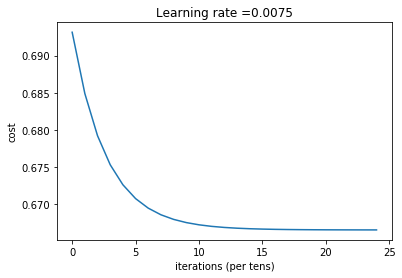

In [4]:
X = np.random.randn(8, 392)
Y = np.random.randn(1, 392)
Y[0, X[0, :] > 0.3] = 1
Y[0, X[0, :] < 0.3] = 0
parameters = L_layer_model(X, Y, layers, num_iterations = 2500, print_cost = True)